In [18]:
# Initial imports
import os
import json
import io
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [19]:
load_dotenv()
alpaca_api_key = os.environ.get("ALPACA_API_KEY")
alpaca_secret_key = os.environ.get("ALPACA_SECRET_KEY")

In [3]:
#Collect Crypto

def get_crypto_price(crypto_name='Bitcoin',currency='USD'):
    """
    Generic function to fetch prices of any given crypto supported by Alternate
    Forms the requests URL
    Hits the alternative 
    Transforms the response and returns the same
    Parameters
    ----------
    cript_script: string
    Name of the crypto. DEFAULT: Equal Bitcoin
    currency: string
    supported currencied by alternative.me DEFAULT: USD
    
    Returns:
    --------
    Price of the crypto
    """
    alternate_ticket_url = "https://api.alternative.me/v2/ticker/"+crypto_name+"/?convert="+currency
    
    response_data = requests.get(alternate_ticket_url)
    if response_data.ok :
         data = json.load(io.BytesIO(response_data.content))
         crypto_price = list(data['data'].items())[0][1]['quotes'][currency]['price']    
         return crypto_price
    else : 
        return NaN

# Fetch current BTC price
# Fetch current ETH price
my_btc = 1.2
my_eth = 5.3
btc_price = get_crypto_price("Bitcoin","CAD")
eth_price = get_crypto_price("Ethereum","CAD")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

# Current amount of shares
# YOUR CODE HERE!


my_spy = 50
my_agg = 200
tickers = ["AGG", "SPY"]


def get_share_prices_using_alpaca(tickers,alpaca_api_key, alpaca_secret_key,start_date,timeframe,end_date):
    """
    Generic function to fetch prices of any given tickers supported by Alpaca 
    Parameters
    ----------
    tickers: list of stock tickers supported by Alpaca
    alpaca_api_key : string  
    alpaca_secret_key: string
    start_date: string eg: Format "yyyy-mm-dd"
    timeframe: string
    end_date : string eg: Format "yyyy-mm-dd"
    Returns:
    --------
    Price of the crypto
    """
    start_date = pd.Timestamp(start_date, tz="America/New_York").isoformat()
    end_date = pd.Timestamp(end_date, tz="America/New_York").isoformat()
    alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")
    df_portfolio = alpaca.get_barset(
        tickers,
        timeframe,
        start = start_date,
        end = end_date,
        limit = 1000
    ).df
    return df_portfolio


df_portfolio = get_share_prices_using_alpaca(tickers,alpaca_api_key,alpaca_secret_key,'2021-05-07','1D','2021-05-07')
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 1.2 BTC is $83403.21
The current value of your 5.3 ETH is $24535.60
Current AGG closing price: $114.645
Current SPY closing price: $422.09
The current value of your 50 SPY shares is $21104.50
The current value of your 200 AGG shares is $22929.00


,amount
crypto,107938.81154
shares,44033.50000


congratulations for having enough money in this fund


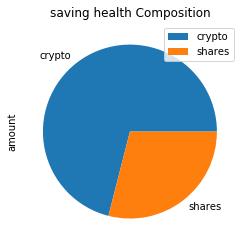

In [4]:
# Set monthly household income
monthly_income = 12000
crypto_savings = my_btc_value + my_eth_value
shares_savings = my_spy_value + my_agg_value
# Create savings DataFrame
value_data = {"amount":{
    "crypto": crypto_savings,
    "shares":shares_savings
}}

df_savings = pd.DataFrame(value_data)
# Display savings DataFrame
display(df_savings)
df_savings.plot.pie(y='amount',title="saving health Composition")

emergency_fund = monthly_income * 3
total_savings = crypto_savings + shares_savings
if total_savings > emergency_fund:
    print("congratulations for having enough money in this fund")
elif tota_savings == emergency_fund :
    print('congratulations for reaching ')
else:
    print('no enough money in the fund')


In [5]:
#MonteCarlo simulation
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
tickers = ["AGG", "SPY"]
df_monte_portfolio = get_share_prices_using_alpaca(tickers,alpaca_api_key,alpaca_secret_key,'2015-08-07','1D','2020-08-07')
df_monte_portfolio.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [6]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_monte_portfolio,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30

)
# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [9]:
# Run a Monte Carlo simulation to forecast thirty years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995277,0.995058,0.999740,0.999786,1.009715,1.003948,1.007577,0.996202,0.998766,1.000671,...,0.990788,0.992600,1.000384,1.008399,0.997209,0.996422,1.000666,1.001306,0.996006,0.999892
2,0.993972,0.994019,0.999390,0.997022,1.005737,0.998369,1.016490,0.991879,0.993724,0.994845,...,0.990319,0.990451,1.000166,1.004306,1.002049,1.004097,0.998386,1.002184,0.989187,0.994377
3,0.992979,0.992349,0.999163,1.005946,1.018187,1.002072,1.026284,0.998654,0.991957,0.998822,...,0.982670,0.993815,1.003387,1.002662,1.002708,1.007987,0.994870,1.008908,0.994068,1.000745
4,0.992837,0.992553,0.991721,1.004591,1.030206,1.001710,1.029579,0.998355,0.992687,0.991128,...,0.984018,1.000977,1.010353,0.995366,1.003294,1.011017,0.988404,1.012644,0.995368,1.009438
5,0.994066,0.994376,0.992975,1.004507,1.036646,1.003742,1.023942,0.996912,0.986859,0.992754,...,0.990551,0.993471,1.008453,1.001275,1.014909,1.017062,0.992820,1.019780,0.984781,1.014675
6,0.997391,0.998190,0.998844,1.011856,1.032173,1.001514,1.024696,0.987844,0.985231,0.984043,...,0.989941,0.996302,1.004663,1.001582,1.009990,1.010036,0.993556,1.012826,0.988430,1.011376
7,1.007474,1.011420,1.006728,1.002150,1.035652,1.003698,1.017701,0.996399,0.994904,0.989066,...,0.993745,0.986967,1.003405,1.001568,1.008350,1.011668,0.990118,1.009469,0.980600,1.018630
8,1.018115,1.004795,1.005449,1.004102,1.045845,1.004220,1.014771,0.988879,0.992640,0.991140,...,1.001062,0.993059,1.004104,0.992480,1.010768,1.012396,0.991899,1.011090,0.982303,1.003521
9,1.018652,1.012367,1.004700,1.004017,1.052877,1.002912,1.016779,0.992152,0.994577,0.992496,...,0.997689,0.997563,0.995930,0.985575,1.015874,1.007151,0.985277,1.019039,0.982078,1.008115


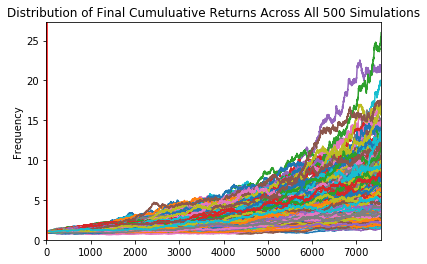

In [8]:
MC_even_dist.plot_simulation()
MC_even_dist.plot_distribution()

In [10]:
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           500.000000
mean              6.083451
std               2.992565
min               1.157002
25%               3.870575
50%               5.443841
75%               7.669138
max              17.859130
95% CI Lower      2.120550
95% CI Upper     13.840098
Name: 7560, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments in stocks

def predict_confidence_interval(initial_investment,even_tbl):
    even_ci_lower = round(even_tbl[8]*initial_investment,2)
    even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
          f" over the next 5 years will end within in the range of"
          f" ${even_ci_lower} and ${even_ci_upper}.")

predict_confidence_interval(20000,even_tbl)
predict_confidence_interval(20000 * 1.5,even_tbl)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $42411.01 and $276801.95.
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $63616.51 and $415202.93.
